In [ ]:
import os 
from dotenv import load_dotenv
load_dotenv('C:/Users/midon/Documents/anomaly-detection-autoencoder-based-basic/.env.local')
PROJECT_PATH = os.getenv('PROJECT_PATH')
os.chdir(PROJECT_PATH)
# import sys
# sys.path.append(PROJECT_PATH)

import preprocessing.preprocessing as pp
from synthetic_data.get_run import *
from synthetic_data.vae import VariationalAutoencoder
from visualisation import compare_point_wise, compare_distribution_plot
from eval.evaluate_recon import evaluate_table
from visualisation import *

In [25]:
run_id = "f76a22b514134bab95e740c7dd576564"
transformer = get_transformer_from_experiment(run_id)
X = transformer.df

In [36]:
synthetic_df = get_recon_transformed_data(run_id)
synthetic_df

Inferred cat_dims from saved weights: 28


,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE_DESCRIPTION,...,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,AGE_DISBURSMENT
0,46403,56045,84.617218,Salaried,1,0,0,0,0,No Bureau History Available,...,0,0,-224,2025,0,0,0,0,0,40
1,42656,60538,73.137932,Self employed,1,0,0,0,0,I-Medium Risk,...,0,0,-4827,4068,0,0,1,20,0,35
2,56891,66871,87.465866,Self employed,1,0,0,0,0,No Bureau History Available,...,0,0,704,1107,0,0,0,1,0,27
3,56101,66444,86.703552,Self employed,1,0,0,0,0,A-Very Low Risk,...,0,0,-7424,1870,103,0,0,17,1,23
4,53115,61458,87.496056,Self employed,1,0,0,0,0,No Bureau History Available,...,0,0,5774,273,100,0,0,0,1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,60649,101883,60.099590,Salaried,0,0,1,0,0,D-Very Low Risk,...,0,0,922,16397,0,0,0,36,0,34
233150,71684,94849,77.479218,Self employed,0,0,1,0,0,No Bureau History Available,...,0,0,-755,3501,0,0,0,7,0,37
233151,34292,66876,52.372620,Salaried,1,0,0,0,0,No Bureau History Available,...,0,0,1942,2765,0,0,0,1,0,44
233152,35299,73113,49.950073,Salaried,1,0,0,0,0,No Bureau History Available,...,0,0,2752,1545,0,0,0,0,0,24


In [35]:
eval_df = evaluate_table(transformer.df, recon_df, transformer.num_cols)
eval_df

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 26/26 [00:01<00:00, 15.22it/s]|
Column Shapes Score: 90.85%

(2/2) Evaluating Column Pair Trends: |██████████| 325/325 [00:11<00:00, 28.18it/s]|
Column Pair Trends Score: 97.95%

Overall Score (Average): 94.4%



,Column,SDV Metric,Column Shape Score,Wasserstein Similarity,Jensen-Shannon Similarity,R2,MAE
0,DISBURSED_AMOUNT,KSComplement,0.978774,0.99,0.9993,0.9340,2625.90
1,ASSET_COST,KSComplement,0.964397,0.99,0.9994,0.9437,3481.99
2,LTV,KSComplement,0.931676,0.99,0.9997,0.9207,2.54
3,EMPLOYMENT_TYPE,TVComplement,0.991491,NaN,NaN,NaN,NaN
4,AADHAR_FLAG,TVComplement,0.999189,NaN,NaN,NaN,NaN
5,PAN_FLAG,TVComplement,0.931393,NaN,NaN,NaN,NaN
6,VOTERID_FLAG,TVComplement,0.995183,NaN,NaN,NaN,NaN
7,DRIVING_FLAG,TVComplement,0.977148,NaN,NaN,NaN,NaN
8,PASSPORT_FLAG,TVComplement,0.997873,NaN,NaN,NaN,NaN
9,PERFORM_CNS_SCORE_DESCRIPTION,TVComplement,0.913156,NaN,NaN,NaN,NaN


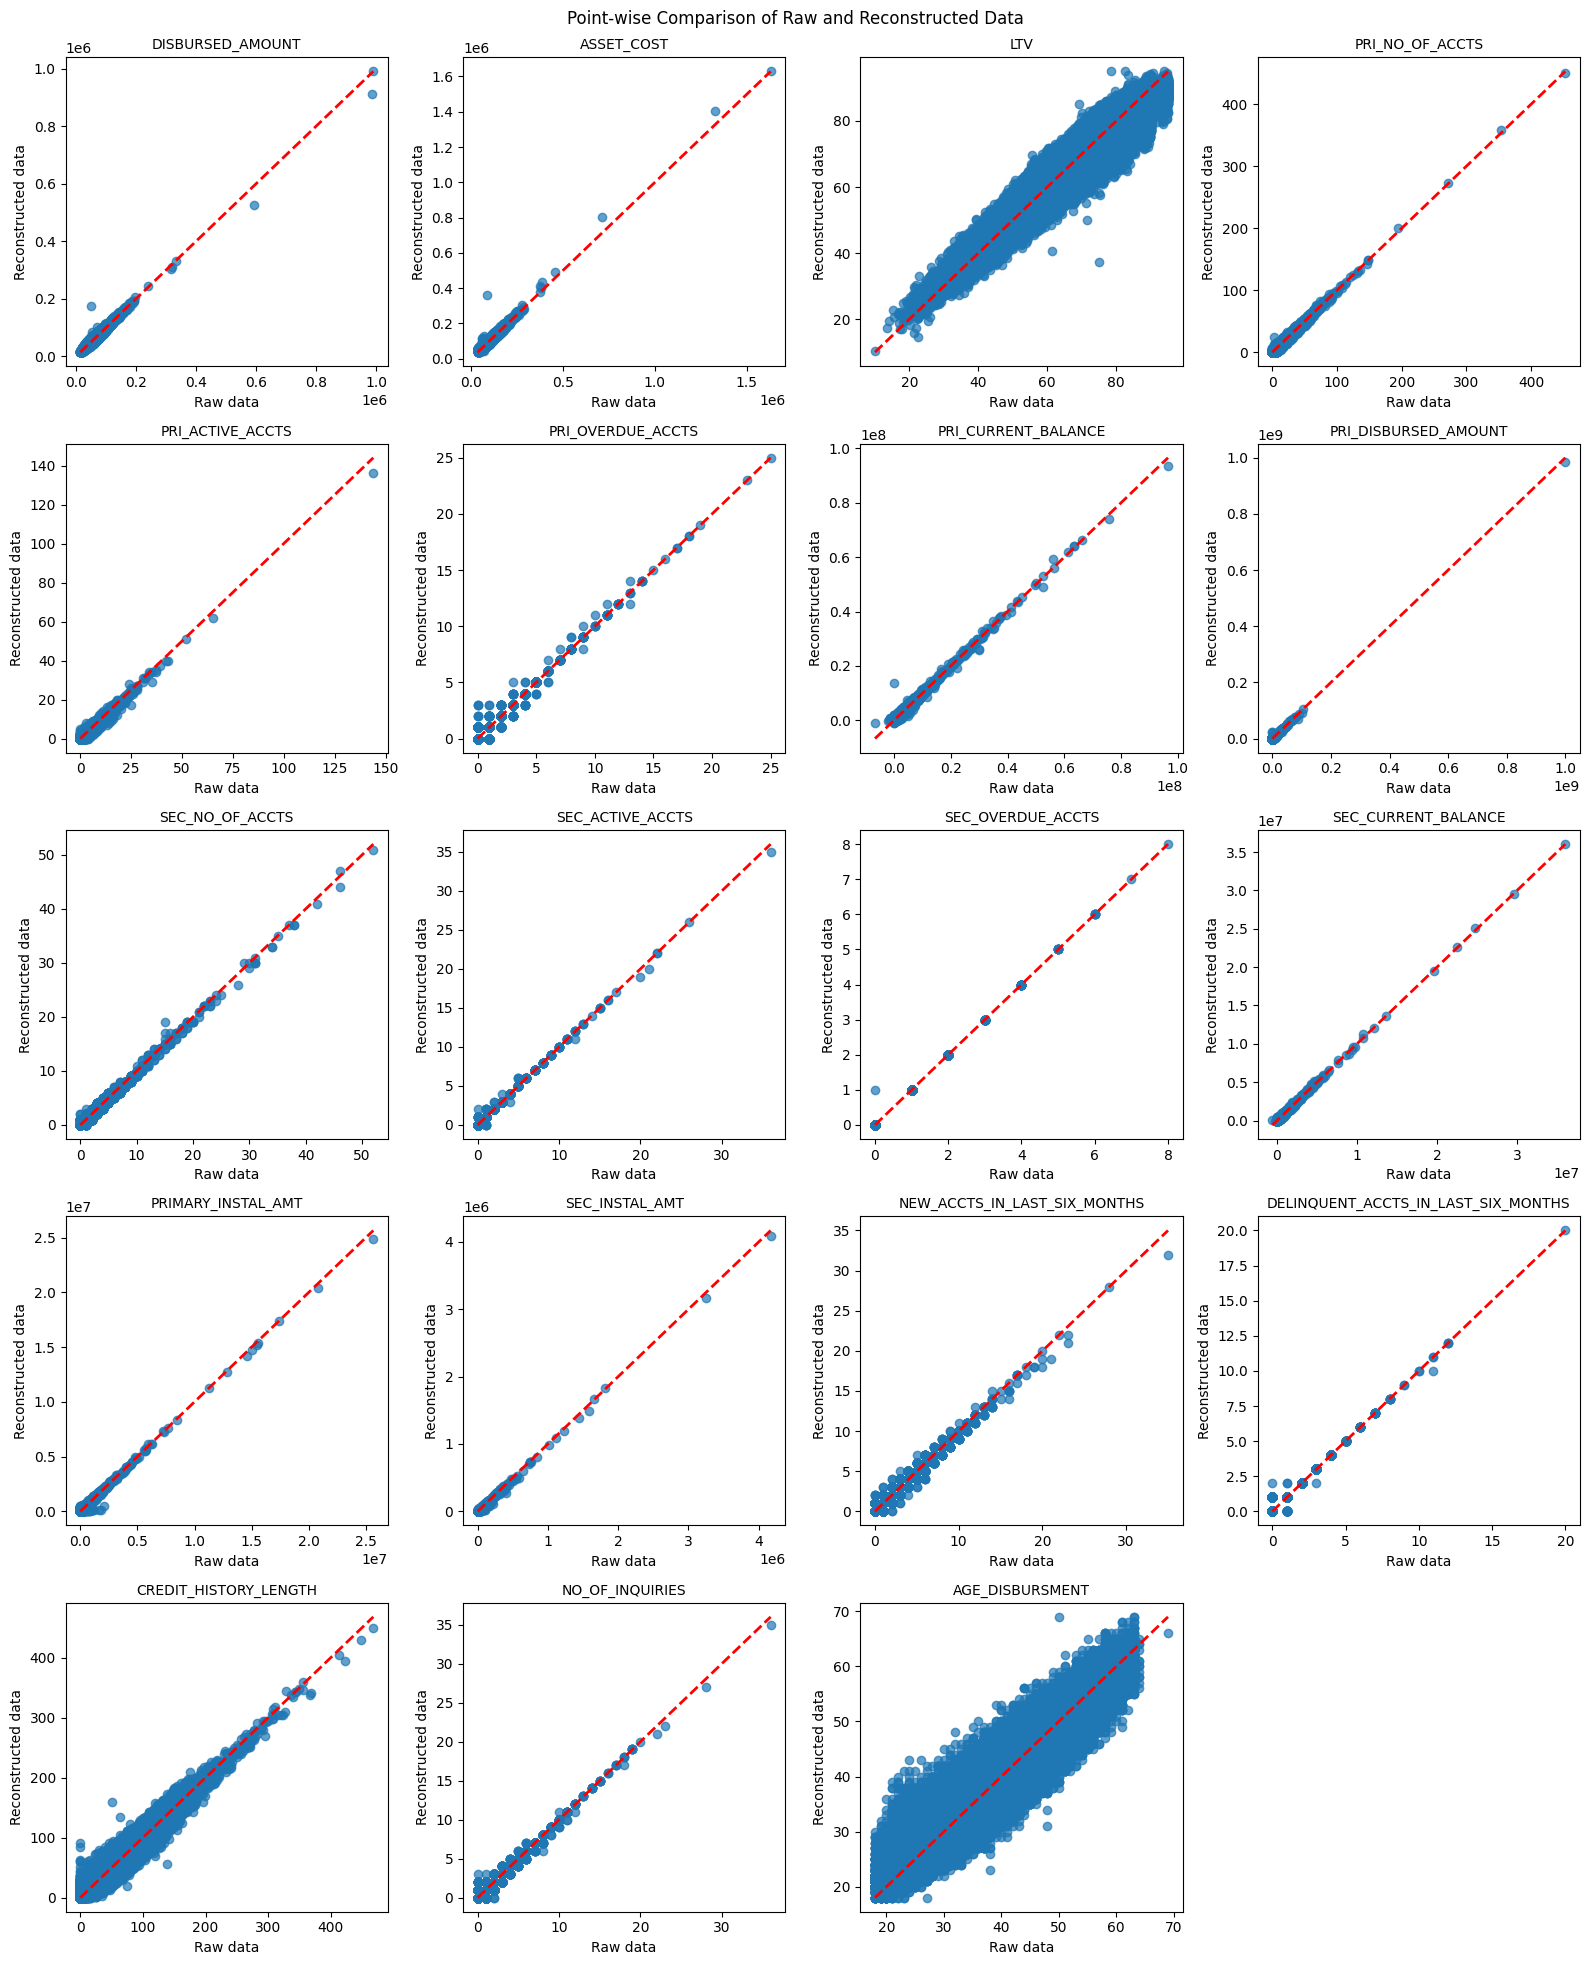

In [ ]:
num_cols = transformer.num_cols
compare_point_wise(X, synthetic_df, num_cols)

C:\Users\midon\Documents\anomaly-detection-autoencoder-based-basic\visualisation.py:91: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


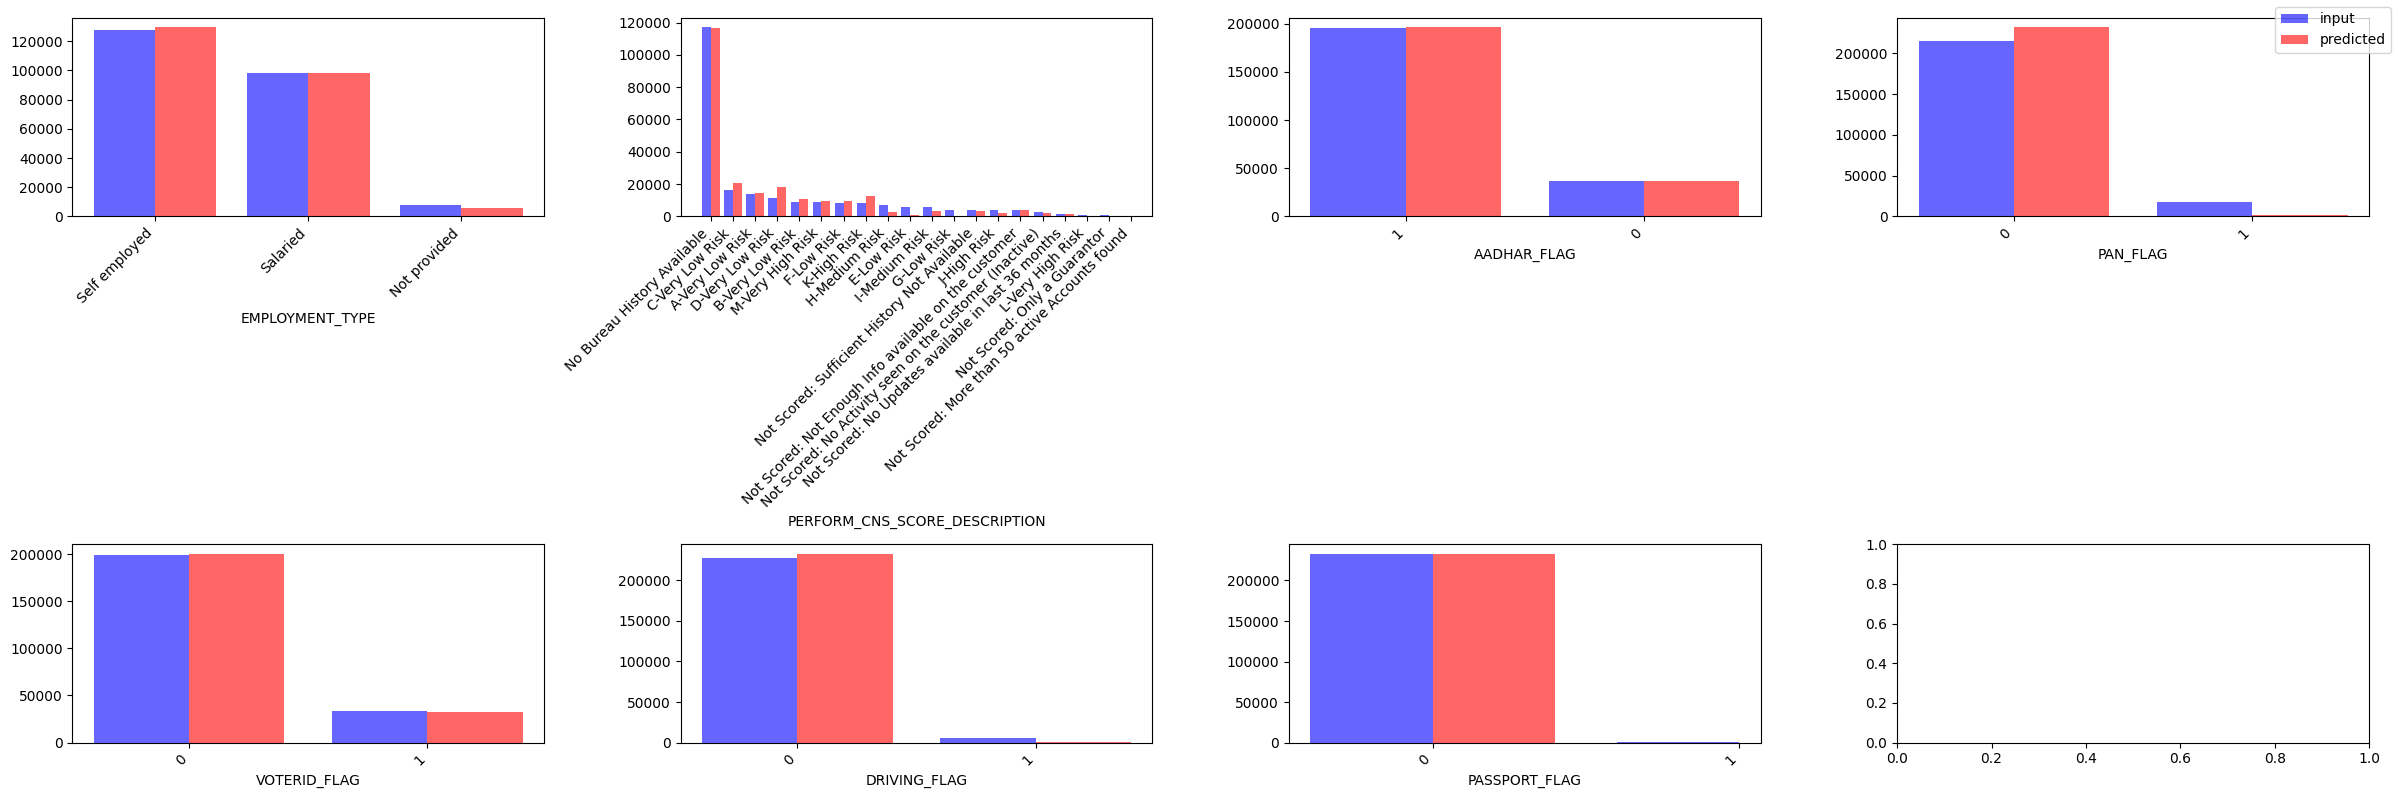

In [ ]:
col_names = {'bool': transformer.bool_cols, 'cat': transformer.cat_cols}
compare_distribution_plot(col_names=col_names, X = X, pred_df=synthetic_df)